IMPORT LIBRARY

In [3]:
import numpy as np
import pandas as pd

from datetime import datetime

In [4]:
# Membaca csv file
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11140\197789132.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


In [5]:
# Melihat 5 baris pertama
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Melihat total baris dan kolom
df.shape

(466285, 75)

In [7]:
# Melihat info seluruh kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
# Melihat unique values pada feature loan_status
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [9]:
# Membuat feature baru yaitu good_bad sebagai target variable,
# Jika loan_statusnya 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)' 
# akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good loan atau 0
df['good_bad'] = np.where(df.loc[:, 'loan_status']. isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']), 1 , 0)

In [10]:
# Melihat distribusi 0 dan 1
df.good_bad.value_counts()

good_bad
0    414099
1     52186
Name: count, dtype: int64

In [11]:
df[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
...,...,...
466280,Current,0
466281,Charged Off,1
466282,Current,0
466283,Fully Paid,0


MISSING VALUE

Men drop feature yang memiliki missing values lebih dari 50%, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [12]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0])

In [13]:
missing_values = missing_values[missing_values.iloc[:,0] > 0.05]

In [14]:
missing_values.sort_values([0], ascending=False)

,0
open_il_12m,1.000000
open_il_6m,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


In [15]:
# Drop feature tersebut
df.dropna(thresh = df.shape[0]*0.5, axis=1, inplace=True)

In [16]:
# Pengecheckan ulang apakah feature tersebut berhasil di drop
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.05]
missing_values.sort_values([0], ascending=False)

,0
next_pymnt_d,0.487286
tot_coll_amt,0.150715
tot_cur_bal,0.150715
total_rev_hi_lim,0.150715
emp_title,0.059166


In [17]:
df.shape

(466285, 55)

DATA SPLITTING

In [18]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi 80/20 dengan menyamakan distribusi dari bad loans di test set dengan train set.
X = df.drop('good_bad', axis=1)
y = df['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
X_train.shape, X_test.shape

((373028, 54), (93257, 54))

In [20]:
y_train.value_counts(normalize=True)

good_bad
0    0.888081
1    0.111919
Name: proportion, dtype: float64

In [21]:
# Distribusi y_test sudah sama persis dengan y_train
y_test.value_counts(normalize=True)

good_bad
0    0.888083
1    0.111917
Name: proportion, dtype: float64

DATA CLEANING

In [22]:
# Terdapat 65 kolom, bagaimana untuk mengetahui kolom apa saja yang memiliki data kotor?
X_train.shape

(373028, 54)

In [23]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu unique values apa saja yang kotor.
for col in X_train.select_dtypes(include= ['object','bool']).columns:
     print(col)
     print(X_train[col].unique())
     print()

term
[' 60 months' ' 36 months']

grade
['C' 'D' 'A' 'B' 'E' 'F' 'G']

sub_grade
['C1' 'D1' 'A1' 'B5' 'B4' 'B2' 'B3' 'C3' 'C5' 'A4' 'E3' 'A5' 'D4' 'A3'
 'D2' 'E5' 'C4' 'D5' 'E1' 'E2' 'F3' 'B1' 'C2' 'D3' 'F1' 'F4' 'A2' 'G3'
 'E4' 'G4' 'G1' 'F5' 'F2' 'G2' 'G5']

emp_title
['Research Associate (Assistant Professor)' 'Volunteer Coordinator'
 'Plant Manger ' ... 'AMR Group' 'Dallas Can Academy' 'Tax Return Center']

emp_length
['9 years' '2 years' '10+ years' '1 year' '< 1 year' '8 years' nan
 '6 years' '3 years' '4 years' '5 years' '7 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Not Verified' 'Source Verified']

issue_d
['Jul-14' 'Oct-13' 'Mar-14' 'Oct-14' 'Aug-11' 'Aug-12' 'Apr-13' 'Nov-07'
 'Jun-12' 'Jul-08' 'Jun-14' 'Sep-13' 'Jul-13' 'May-13' 'Feb-12' 'Jun-10'
 'Jun-13' 'Apr-14' 'Jul-12' 'Aug-14' 'Nov-13' 'Jan-14' 'Dec-13' 'Dec-14'
 'Feb-14' 'Dec-12' 'May-11' 'Nov-12' 'Sep-14' 'Feb-13' 'Nov-14' 'Sep-11'
 'Jan-13' 'May-14' 'Jun-

In [24]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [25]:
# Menghilangkan ' months' menjadi ''
X_train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [26]:
pd.to_numeric(X_train['term'].str.replace('months', ''))

335623    60
82177     36
339560    36
429575    36
264917    36
          ..
85335     36
400460    36
3982      60
280424    36
354718    36
Name: term, Length: 373028, dtype: int64

In [27]:
# Convert data type menjadi numeric
X_train['term'] = pd.to_numeric(X_train['term'].str.replace('months', ''))

In [28]:
X_train['term']

335623    60
82177     36
339560    36
429575    36
264917    36
          ..
85335     36
400460    36
3982      60
280424    36
354718    36
Name: term, Length: 373028, dtype: int64

In [29]:
# Cek values apa saja yang harus di cleaning
X_train['emp_length'].unique()

array(['9 years', '2 years', '10+ years', '1 year', '< 1 year', '8 years',
       nan, '6 years', '3 years', '4 years', '5 years', '7 years'],
      dtype=object)

In [30]:
X_train['emp_length'] = X_train['emp_length'].str.replace('+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)

In [31]:
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [32]:
X_train['emp_length']

335623     9
82177      2
339560    10
429575    10
264917     1
          ..
85335      2
400460     4
3982       4
280424     1
354718     0
Name: emp_length, Length: 373028, dtype: int64

In [33]:
# Cek feature date
col_date = [ 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,Jul-14,Apr-92,Jan-16,Jan-16,Jan-16
82177,Oct-13,Oct-94,Dec-13,NaN,May-14
339560,Jul-14,Mar-94,Mar-15,NaN,Mar-15
429575,Mar-14,Feb-00,Aug-15,NaN,Jan-16
264917,Oct-14,Mar-01,Oct-15,Jan-16,Jan-16
...,...,...,...,...,...
85335,Sep-13,Jun-89,Jan-16,Jan-16,Jan-16
400460,Apr-14,Aug-99,Jan-16,Feb-16,Jan-16
3982,Nov-11,Feb-03,Jun-12,NaN,Nov-12
280424,Oct-14,Jul-92,Jan-16,Jan-16,Jan-16


In [34]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'], format='%b-%y')
X_train['earliest_cr_line'] = pd.to_datetime(X_train['earliest_cr_line'], format='%b-%y')
X_train['last_pymnt_d'] = pd.to_datetime(X_train['last_pymnt_d'], format='%b-%y')
X_train['next_pymnt_d'] = pd.to_datetime(X_train['next_pymnt_d'], format='%b-%y')
X_train['last_credit_pull_d'] = pd.to_datetime(X_train['last_credit_pull_d'], format='%b-%y')

In [35]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
335623,2014-07-01,1992-04-01,2016-01-01,2016-01-01,2016-01-01
82177,2013-10-01,1994-10-01,2013-12-01,NaT,2014-05-01
339560,2014-07-01,1994-03-01,2015-03-01,NaT,2015-03-01
429575,2014-03-01,2000-02-01,2015-08-01,NaT,2016-01-01
264917,2014-10-01,2001-03-01,2015-10-01,2016-01-01,2016-01-01
...,...,...,...,...,...
85335,2013-09-01,1989-06-01,2016-01-01,2016-01-01,2016-01-01
400460,2014-04-01,1999-08-01,2016-01-01,2016-02-01,2016-01-01
3982,2011-11-01,2003-02-01,2012-06-01,NaT,2012-11-01
280424,2014-10-01,1992-07-01,2016-01-01,2016-01-01,2016-01-01


In [36]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93257 entries, 38664 to 89759
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   term                93257 non-null  object
 1   emp_length          89173 non-null  object
 2   issue_d             93257 non-null  object
 3   earliest_cr_line    93252 non-null  object
 4   last_pymnt_d        93187 non-null  object
 5   next_pymnt_d        47770 non-null  object
 6   last_credit_pull_d  93246 non-null  object
dtypes: object(7)
memory usage: 5.7+ MB


In [37]:
X_test['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [38]:
pd.to_numeric(X_test['term'].str.replace('months', ''))

38664     36
251508    36
11299     60
407595    36
439516    60
          ..
384945    60
464682    60
261146    60
40763     36
89759     36
Name: term, Length: 93257, dtype: int64

In [39]:
# Lakukan hal yang sama untuk X_test
X_test['term'] = pd.to_numeric(X_test['term'].str.replace('months', ''))

In [40]:
X_test['emp_length'].unique()

array(['2 years', '10+ years', '7 years', '9 years', '5 years',
       '< 1 year', '3 years', '1 year', '6 years', '8 years', nan,
       '4 years'], dtype=object)

In [41]:
X_test['emp_length'] = X_test['emp_length'].str.replace('+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace('year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)

In [42]:
X_test['emp_length'].unique()

array(['2 ', '10', '7 ', '9 ', '5 ', '0', '3 ', '1 ', '6 ', '8 ', 0, '4 '],
      dtype=object)

In [43]:
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

In [44]:
# Check apakah berhasil di cleaning
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93257 entries, 38664 to 89759
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   term                93257 non-null  int64 
 1   emp_length          93257 non-null  int64 
 2   issue_d             93257 non-null  object
 3   earliest_cr_line    93252 non-null  object
 4   last_pymnt_d        93187 non-null  object
 5   next_pymnt_d        47770 non-null  object
 6   last_credit_pull_d  93246 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.7+ MB


In [45]:
col_date = [ 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

X_test[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
38664,Jun-08,Sep-86,Jul-11,NaN,May-12
251508,Nov-14,Oct-01,Dec-15,Jan-16,Jan-16
11299,Jul-11,Oct-96,Oct-15,NaN,Oct-15
407595,Apr-14,Sep-98,Jan-16,Feb-16,Jan-16
439516,Feb-14,Jul-88,Dec-15,Feb-16,Jan-16
...,...,...,...,...,...
384945,May-14,Nov-90,Jan-16,Feb-16,Jan-16
464682,Jan-14,Apr-96,Nov-14,NaN,Nov-14
261146,Nov-14,Nov-06,Jun-15,NaN,Dec-15
40763,Jan-10,Dec-89,Mar-13,Mar-13,Feb-13


In [46]:
X_test['issue_d'] = pd.to_datetime(X_test['issue_d'], format='%b-%y')
X_test['earliest_cr_line'] = pd.to_datetime(X_test['earliest_cr_line'], format='%b-%y')
X_test['last_pymnt_d'] = pd.to_datetime(X_test['last_pymnt_d'], format='%b-%y')
X_test['next_pymnt_d'] = pd.to_datetime(X_test['next_pymnt_d'], format='%b-%y')
X_test['last_credit_pull_d'] = pd.to_datetime(X_test['last_credit_pull_d'], format='%b-%y')

In [47]:
# Check apakah berhasil di cleaning
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93257 entries, 38664 to 89759
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   term                93257 non-null  int64         
 1   emp_length          93257 non-null  int64         
 2   issue_d             93257 non-null  datetime64[ns]
 3   earliest_cr_line    93252 non-null  datetime64[ns]
 4   last_pymnt_d        93187 non-null  datetime64[ns]
 5   next_pymnt_d        47770 non-null  datetime64[ns]
 6   last_credit_pull_d  93246 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 5.7 MB


FEATURING ENGINERING

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 54), (373028,), (93257, 54), (93257,))

In [49]:
# Kolom yang akan di feature engineering
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [50]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [51]:
# tidak dibutuhkan untuk feature engineering
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [52]:
X_train.shape, X_train.shape

((373028, 6), (373028, 6))

In [53]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2023-12-05'

In [54]:
today_str = date.today().strftime('%y-%m-%d')

In [55]:
today_datetime = pd.to_datetime(today_str, format='%y-%m-%d')

In [56]:
selisih_hari = today_datetime - pd.to_datetime('2008-06-01')

In [57]:
selisih_hari

Timedelta('5665 days 00:00:00')

In [58]:
X_train

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
335623,60,9,2014-07-01,1992-04-01,2016-01-01,2016-01-01
82177,36,2,2013-10-01,1994-10-01,2013-12-01,2014-05-01
339560,36,10,2014-07-01,1994-03-01,2015-03-01,2015-03-01
429575,36,10,2014-03-01,2000-02-01,2015-08-01,2016-01-01
264917,36,1,2014-10-01,2001-03-01,2015-10-01,2016-01-01
...,...,...,...,...,...,...
85335,36,2,2013-09-01,1989-06-01,2016-01-01,2016-01-01
400460,36,4,2014-04-01,1999-08-01,2016-01-01,2016-01-01
3982,60,4,2011-11-01,2003-02-01,2012-06-01,2012-11-01
280424,36,1,2014-10-01,1992-07-01,2016-01-01,2016-01-01


In [59]:
# feature engineering untuk date columns
def date_columns(df, column):
    today_datetime = pd.to_datetime(datetime.today().strftime('%m-%y'), format='%m-%y')
    df[column] = pd.to_datetime(df[column], format="%m-%y")
    df['mths_since_' + column] = round((today_datetime - df[column]) / np.timedelta64(1, 'm'))
    df.drop(columns=[column], inplace=True)

# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [60]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [61]:
X_train

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
335623,60,9,16655040.0,4953600.0,4163040.0,4163040.0
82177,36,2,15340320.0,5346720.0,5258880.0,5041440.0
339560,36,10,15648480.0,4953600.0,4603680.0,4603680.0
429575,36,10,12533760.0,5129280.0,4383360.0,4163040.0
264917,36,1,11966400.0,4821120.0,4295520.0,4163040.0
...,...,...,...,...,...,...
85335,36,2,18145440.0,5389920.0,4163040.0,4163040.0
400460,36,4,12798720.0,5084640.0,4163040.0,4163040.0
3982,60,4,10955520.0,6354720.0,6048000.0,5827680.0
280424,36,1,16524000.0,4821120.0,4163040.0,4163040.0


In [62]:
X_test.isnull().sum()

term                              0
emp_length                        0
mths_since_earliest_cr_line       5
mths_since_issue_d                0
mths_since_last_pymnt_d          70
mths_since_last_credit_pull_d    11
dtype: int64

In [63]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line       24
mths_since_issue_d                 0
mths_since_last_pymnt_d          306
mths_since_last_credit_pull_d     31
dtype: int64

MODELLING

In [64]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [65]:
X_test.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

In [66]:
X_train.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model1 = LogisticRegression()

In [69]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [70]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8867323632542329

In [72]:
pip install --upgrade scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

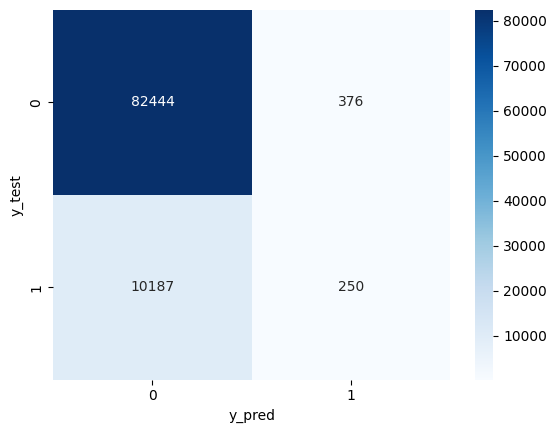

In [74]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

Prediksi 'loan' yang akan berhasil bayar setelah menggunakan thresholds 0.5 yaitu sebesar 82444

Prediksi 'loan' yang akan gagal bayar setelah menggunakan thresholds 0.5 yaitu sebesar 250

In [75]:
y_train.value_counts(normalize=True)

good_bad
0    0.888081
1    0.111919
Name: proportion, dtype: float64

MODELLING II

In [76]:
model1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
# memprediksi probability dan mengambil probability kelas positive
y_pred = model1.predict_proba(X_test)[:, 1]

In [78]:
y_pred

array([0.02252746, 0.14540996, 0.00837925, ..., 0.2620512 , 0.01637653,
       0.20757429])

In [79]:
(y_pred>0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

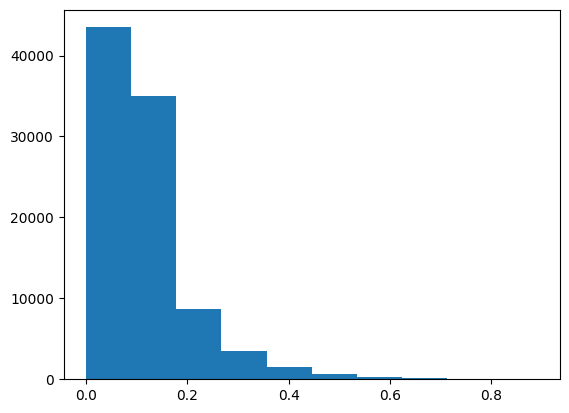

In [80]:
# distribusi predicted probability
plt.hist(y_pred);

Diagram di atas menunjukan nilai probabilitas dominan jatuh pada 0.0 - 0.1

Sehingga kurang akurat jika menggunakan threshold 0.5

In [81]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test, y_pred)

In [82]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.13572690756075814

In [83]:
y_pred = model1.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.135).astype(int)

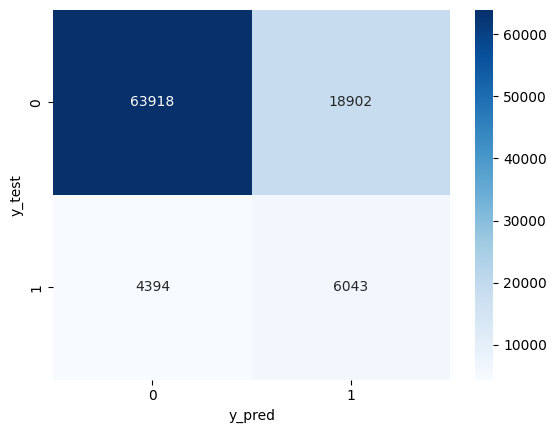

In [84]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

Prediksi 'loan' yang akan berhasil bayar setelah menggunakan best thresholds yaitu sebesar 63918 atau menurun 22,47%

Prediksi 'loan' yang akan gagal bayar setelah menggunakan best thresholds yaitu sebesar 6043 atau meningkat 2317%

In [85]:
model1.coef_

array([[ 3.83058994e-12, -9.19738294e-12, -4.72835634e-08,
        -1.70048129e-06,  2.45087937e-06, -8.19118463e-07]])

In [86]:
model1.intercept_

array([-1.19827421e-12])

In [87]:
df_coeff = pd.DataFrame(model1.coef_, columns=X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,3.830590e-12,-9.197383e-12,-4.728356e-08,-0.000002,0.000002,-8.191185e-07


term = semakin tinggi jangka waktu melunasi hutangnya semakin tinggikemungkinan gagal bayarnya

emp_length = semakin tinggi nilai negatifnya (semakin banyak pengalaman) kemungkinan untuk gagal bayarnya semakin rendah

mths_since_earliest_cr_line = semakin tinggi nilai negatifnya (umur credit line semakin lama) kemungkinan gagal bayar semakin rendah

mths_since_issue_d = semakin rendah nilai negatifnya (waktu uang dicairkan semakin lama), semakin tinggi kemungkinan gagal bayarnya 

mths_since_last_pymnt_d = semakin tinggi nilai positifnya (semakin lama pembayaran terakhirnya), semakin tinggi kemungkinan gagal bayar

In [88]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
335623,60,9,16655040.0,4953600.0,4163040.0,4163040.0
82177,36,2,15340320.0,5346720.0,5258880.0,5041440.0
339560,36,10,15648480.0,4953600.0,4603680.0,4603680.0
429575,36,10,12533760.0,5129280.0,4383360.0,4163040.0
264917,36,1,11966400.0,4821120.0,4295520.0,4163040.0
